# Drug Response Prediction Using Gene Expression Data

### Reading the Gene Response Dataset

In [4]:
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

from cmapPy.pandasGEXpress.parse import parse
import pandas as pd

# Dataset path
gctx_file_path = '/home/batman/Downloads/Datasets/level5_beta_trt_misc_n8283x12328.gctx'

# Read the .gctx file
data = parse(gctx_file_path)

# Extract the main data as a pandas DataFrame
df = data.data_df
df = df.reset_index()

# Display the first few rows of the data
print(df.head())

cid    rid  ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.3125:24  \
0       10                                           0.071321    
1      100                                           1.174841    
2     1000                                           0.396398    
3    10000                                          -0.301154    
4    10001                                           0.040449    

cid  ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.3125:3  \
0                                            -0.135682   
1                                             0.447374   
2                                             0.241946   
3                                             0.012122   
4                                             1.011675   

cid  ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.625:24  \
0                                            -0.244771   
1                                             1.119571   
2                                            -0.008839   
3                     

In [2]:
# Example cell line and drug for testing
# cell_line = 'A375'
# drug = 'ADO-TRASTUZUMAB_EMTANSINE'

# 8283 columns in the dataset

# ---------------------------------#
# 69 cell lines type               #
# 1018 Drug types                  #
# 63 conc values                   #
# 2 values for time                #
# ---------------------------------#

import re

cols = df.columns
cell_line = []
drugs = []
conc_values = []
time_points = []

for col in cols:
    # tokens = col.split(":")
    regex = r'(?P<cell_line>[^:]+):(?P<drug>[^:]+)(:(?P<concentration>\d*\.?\d*))?(:(?P<time>\d+))?'
    # Apply regex to extract the values
    match = re.match(regex, col)
    if (match):
        cell_line_extracted = match.group("cell_line")
        if cell_line_extracted:
            cell_line.append(cell_line_extracted)
        
        drug_extracted = match.group("drug")
        if drug_extracted:
            drugs.append(drug_extracted)

        concentration_extracted = match.group("concentration")
        if concentration_extracted:
            conc_values.append(concentration_extracted)
        
        time_extracted = match.group("time")
        if time_extracted:
            time_points.append(time_extracted)

    else:
        print("No Match found!!=====================================")

print(len(set(cell_line)), "Cell Lines: \n--------------------------\n", set(cell_line))
print("\n")
print(len(set(drugs)), "Drugs: \n--------------------------\n", set(drugs))
print("\n")
print(len(set(conc_values)), "Conc Values: \n--------------------------\n", set(conc_values))
print("\n")
print(len(set(time_points)), "Time Points: \n--------------------------\n", set(time_points))
print("\n")



No Match found!!=====================================
69 Cell Lines: 
--------------------------
 {'LJP003_BT20_6H', 'LJP004_MDAMB231_1H', 'LJP004_HS578T_6H', 'CYT001_HEPG2_4H', 'CYT001_MCF7_2H', 'ABY001_PC3_XH', 'CYT001_MCF7_4H', 'CYT001_PC3_4H', 'LJP004_BT20_6H', 'CYT001_PC3_2H', 'CYT001_HA1E_4H', 'CYT001_A549_2H', 'ABY001_A549_XH', 'LJP004_MCF10A_6H', 'PAL001_PC3_XH', 'CYT001_HA1E_2H', 'LJP004_MCF7_6H', 'ABY001_NCIH596_XH', 'ABY001_NCIH2073_XH', 'ABY001_H1975_XH', 'GMB001_HL60_24H', 'GMB001_HT29_2H', 'LJP004_SKBR3_6H', 'CYT001_A375_4H', 'ABY001_NCIH1975_XH', 'ABY001_SKBR3_XH', 'LJP003_SKBR3_6H', 'LJP003_MCF10A_6H', 'LJP004_MDAMB231_6H', 'LJP004_SKBR3_1H', 'CYT001_HCC515_4H', 'LJP003_SKBR3_1H', 'CYT001_HT29_4H', 'LJP003_SKBR3_24H', 'LJP004_MCF10A_1H', 'ABY001_HT29_XH', 'CYT001_HT29_2H', 'ABY001_NCIH508_XH', 'ABY001_HEPG2_XH', 'CYT001_VCAP_4H', 'CYT001_A549_4H', 'CYT001_VCAP_2H', 'LJP003_HS578T_24H', 'LJP003_MCF7_24H', 'LJP003_MDAMB231_24H', 'ABY001_A375_XH', 'LJP003_BT20_1H', 'LJP004

Cell Line:  ABY001_A375_XH
Drug:  ADO-TRASTUZUMAB_EMTANSINE


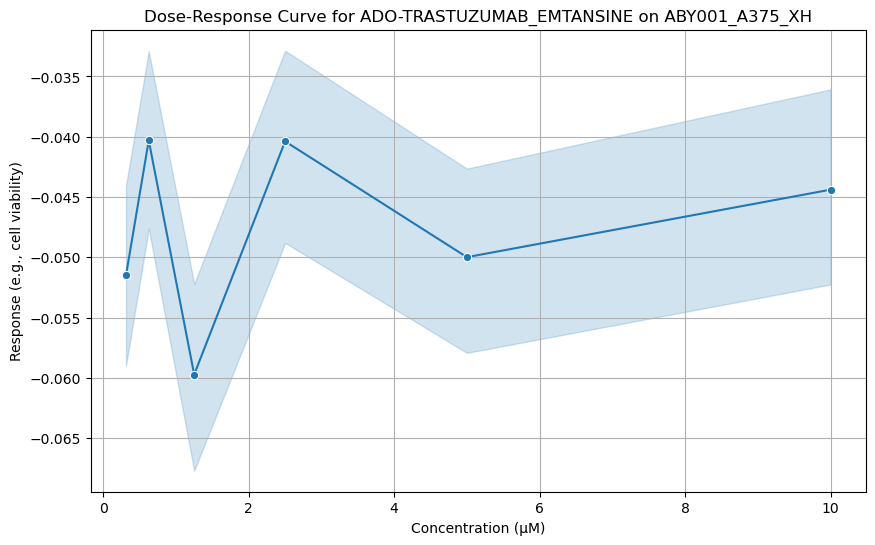

In [3]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example cell line and drug for testing
# cell_line = 'A375'
# drug = 'ADO-TRASTUZUMAB_EMTANSINE'

cell_line = input("Cell Line: ")
drug = input("Drug: ")

# Extract columns corresponding to the specific cell line and drug
def extract_info(col_name):
    # Use regex to extract cell line, drug, concentration, and time
    match = re.search(rf'{cell_line}.*{drug}:(\d+\.?\d*):(\d+)', col_name)
    if match:
        concentration = float(match.group(1))  # Extract concentration
        time_point = int(match.group(2))       # Extract time point (e.g., 24, 72)
        return concentration, time_point
    return None

# Get the columns that match the cell line and drug
filtered_columns = [(col, extract_info(col)) for col in df.columns if extract_info(col)]

# Create a new DataFrame for the filtered columns
if filtered_columns:
    selected_columns, extracted_info = zip(*filtered_columns)
    df_filtered = df[list(selected_columns)]

    # Stack the data and replicate concentration and time point for each value in the column
    stacked_data = df_filtered.stack().reset_index(drop=True)

    # Create arrays for concentration and time point to match the stacked data length
    concentrations = []
    time_points = []
    for _, (concentration, time_point) in enumerate(extracted_info):
        concentrations.extend([concentration] * len(df_filtered))
        time_points.extend([time_point] * len(df_filtered))

    # Create a new DataFrame with the stacked data, concentration, and time point
    df_final = pd.DataFrame({
        'response': stacked_data,
        'concentration': concentrations[:len(stacked_data)],  # Match the lengths
        'time_point': time_points[:len(stacked_data)]  # Match the lengths
    })

    # Plot the dose-response curve (concentration vs response)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_final, x='concentration', y='response', marker='o')
    plt.title(f'Dose-Response Curve for {drug} on {cell_line}')
    plt.xlabel('Concentration (µM)')
    plt.ylabel('Response (e.g., cell viability)')
    plt.grid(True)
    plt.show()
else:
    print(f"No matching columns found for {cell_line} and {drug}")

Cell Line:  ABY001_A375_XH
Drug:  ADO-TRASTUZUMAB_EMTANSINE


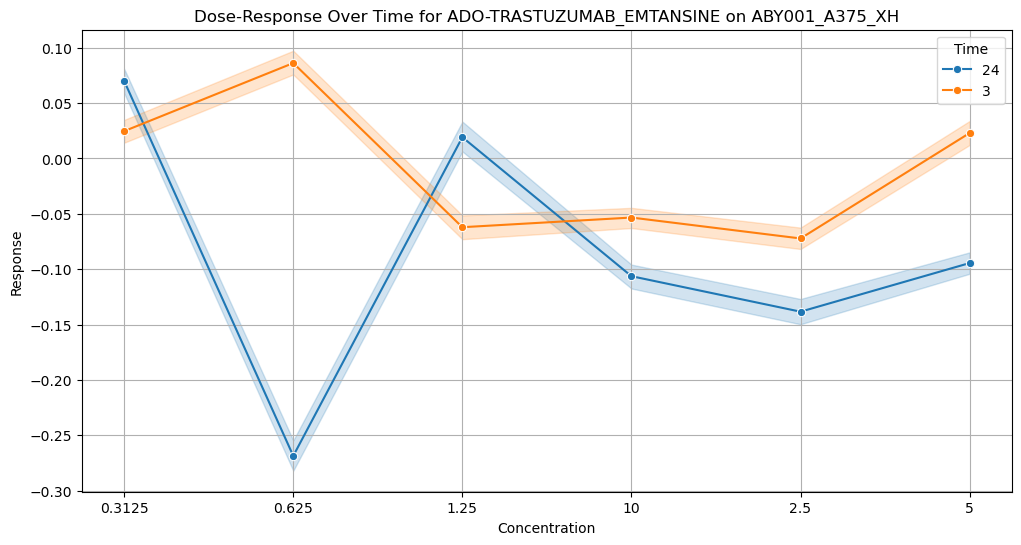

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame `df`
# Selecting a specific cell line and drug for demonstration
# cell_line = 'ABY001_A375_XH'
# drug = 'ADO-TRASTUZUMAB_EMTANSINE'
cell_line = input("Cell Line: ")
drug = input("Drug: ")

# Filter for the specific cell line and drug combination
df_filtered = df.filter(like=f"{cell_line}:{drug}", axis=1)

# Reshape the data for easier plotting
df_melted = df_filtered.melt(var_name='Condition', value_name='Response')
df_melted['Concentration'] = df_melted['Condition'].apply(lambda x: x.split(':')[2])
df_melted['Time'] = df_melted['Condition'].apply(lambda x: x.split(':')[3])

# Plot the dose-response over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Concentration', y='Response', hue='Time', marker='o')
plt.title(f'Dose-Response Over Time for {drug} on {cell_line}')
plt.xlabel('Concentration')
plt.ylabel('Response')
plt.grid(True)
plt.show()

In [5]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example cell line and drug for testing
cell_line = 'A375'
drug = 'ADO-TRASTUZUMAB_EMTANSINE'

# cell_line = input("Cell Line: ")
# drug = input("Drug: ")

# Function to extract concentration and time point using regex
def extract_info(col_name):
    # Use regex to extract cell line, drug, concentration, and time
    match = re.search(rf'{cell_line}.*{drug}:(\d+\.?\d*):(\d+)', col_name)
    if match:
        concentration = float(match.group(1))  # Extract concentration
        time_point = int(match.group(2))       # Extract time point (e.g., 24, 72)
        return concentration, time_point
    return None

# Get the columns that match the cell line and drug
filtered_columns = [(col, extract_info(col)) for col in df.columns if extract_info(col)]

rid = 9990
df[['rid', 'ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.3125:24']]

cid,rid,ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.3125:24
0,10,0.071321
1,100,1.174841
2,1000,0.396398
3,10000,-0.301154
4,10001,0.040449
...,...,...
12323,9990,-0.098859
12324,9991,-0.190106
12325,9992,-0.440690
12326,9993,-0.414078


In [6]:
import re
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example cell line and drug for testing
cell_line = 'A375'
drug = 'ADO-TRASTUZUMAB_EMTANSINE'

# cell_line = input("Cell Line: ")
# drug = input("Drug: ")

# Function to extract concentration and time point using regex
def extract_info(col_name):
    # Use regex to extract cell line, drug, concentration, and time
    match = re.search(rf'{cell_line}.*{drug}:(\d+\.?\d*):(\d+)', col_name)
    if match:
        concentration = float(match.group(1))  # Extract concentration
        time_point = int(match.group(2))       # Extract time point (e.g., 24, 72)
        return concentration, time_point
    return None

# Get the columns that match the cell line and drug
filtered_columns = [(col, extract_info(col)) for col in df.columns if extract_info(col)]

# Create a new DataFrame for the filtered columns
if filtered_columns:
    selected_columns, extracted_info = zip(*filtered_columns)
    df_filtered = df[list(selected_columns)]

    # Stack the data and replicate concentration and time point for each value in the column
    stacked_data = df_filtered.stack().reset_index(drop=True)

    # Create arrays for concentration and time point to match the stacked data length
    concentrations = []
    time_points = []
    for _, (concentration, time_point) in enumerate(extracted_info):
        concentrations.extend([concentration] * df_filtered.shape[0])
        time_points.extend([time_point] * df_filtered.shape[0])

    # Create a new DataFrame with the stacked data, concentration, and time point
    df_final = pd.DataFrame({
        'response': stacked_data,
        'concentration': concentrations[:len(stacked_data)],  # Match the lengths
        'time_point': time_points[:len(stacked_data)]  # Match the lengths
    })

    features = df_final[['response', 'concentration', 'time_point']]

    pca = PCA(n_components=2)  # Choose the number of components based on explained variance or total number of features
    pca_features = pca.fit_transform(features)

    # Add PCA features to the DataFrame
    df_pca = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])

    # # Prepare feature matrix and target variable
    # X = df_pca[['concentration', 'time_point']]
    # y = df_pca['response']
    # Prepare feature matrix and target variable
    X = df_pca  # Use PCA-transformed features
    y = df_final['response']  # Assuming 'response' is still the target variable
    
    # Print shapes to verify
    print("Feature Matrix Shape:", X.shape)
    print("Target Variable Shape:", y.shape)

    # print(X.shape)
    # print(y.shape)
    # print(df_final)
    

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
else:
    print(f"No matching columns found for {cell_line} and {drug}")


Feature Matrix Shape: (147936, 2)
Target Variable Shape: (147936,)
Mean Squared Error: 2.7964433096902083e-05
R-squared: 0.999928171125235


In [7]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", scores)
print("Mean Cross-Validation R-squared Score:", scores.mean())


Cross-Validation R-squared Scores: [0.99957799 0.99894469 0.99940484 0.99985777 0.99973222]
Mean Cross-Validation R-squared Score: 0.9995035012484788


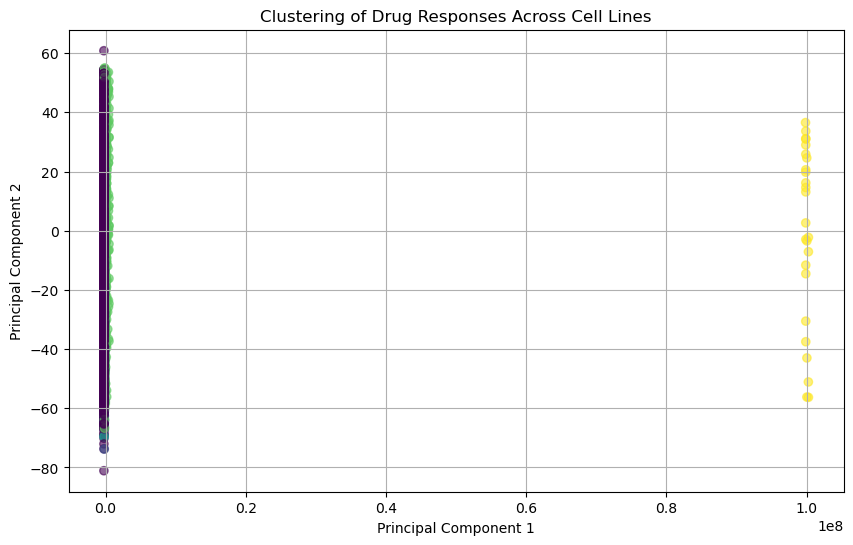

In [5]:
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# # Apply Incremental PCA to reduce dimensionality for clustering
ipca = IncrementalPCA(n_components=2, batch_size=1000)
pca_result = ipca.fit_transform(df.values)

# Use MiniBatchKMeans with batch size to reduce memory usage
mb_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=1000, random_state=42)
clusters = mb_kmeans.fit_predict(pca_result)

# Plot the PCA results with clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Clustering of Drug Responses Across Cell Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
